Universidade Tecnológica Federal do Paraná, Câmpus Campo Mourão - UTFPR-CM

Departamento Acadêmico de Computação - DACOM

BCC6003 - Inteligência Computacional

Prof. Dr. Juliano Henrique Foleis

# Atividade Prática - KNN

In [1]:
#Importando as bases de dados
# https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset
from sklearn.datasets import load_wine 

# O módulo model_selection contém funcionalidades importantes para avaliação de modelos
## train_test_split é responsável por particionar a base de dados em dois conjuntos: treino e teste
from sklearn.model_selection import train_test_split

# O módulo preprocessing contém funcionalidades de normalização e padronização de dados
## StandardScaler implementa a normalização z-score
from sklearn.preprocessing import StandardScaler

# O módulo neighbors implementa algoritmos baseados em análise de vizinhança
## KNeighborsClassifier implementa o Classificador KNN
from sklearn.neighbors import KNeighborsClassifier

# O módulo metrics oferece métricas de avaliação e visualização de resultados
## accuracy_score implementa a métrica de acurácia: total_de_acertos/total_de_predicoes
## classification_report mostra um relatório de métricas para todas as classes
## ConfusionMatrixDisplay renderiza uma matriz de confusão
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Matplotlib é uma biblioteca para fazer gráficos.
import matplotlib.pyplot as plt

# Importar a função explicar_mconf do arquivo utils.py
# Esta função mostra quais erros foram cometidos pelo classificador a partir da matriz de confusão.
from utils import explicar_mconf

# Parametrização do Experimento

In [2]:
# Padronizar a escala usando z-score? 
USAR_SCALER = False
# Quantos vizinhos usar no algoritmo KNN?
K = 1
# Qual métrica de distância utilizar?
DISTANCIA = "euclidean" # euclidean, manhattan

# Experimento KNN

In [3]:
# Carregar o dataset
## X é uma matriz de características (features) m x n, onde m é o número de características e n é o número de exemplos
## y é o vetor de n rótulos, onde n é o número de exemplos.
### X[0] é o vetor de características do exemplo 0, e y[0] é o rótulo do exemplo 0
X, y = load_wine(return_X_y=True)

In [4]:
# Particionar a base de dados em um conjunto de treino com 80% dos exemplos, e um conjunto de testes com 20% dos exemplos.
# stratify=y é para garantir (o máximo possível) que a distribuição das amostras nos conjuntos de treino e teste vai respeitar
# as proporções das classes do conjunto de dados original.
# random_state=99 garante que os conjuntos serão os mesmos em todas as execuções
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify=y, test_size=0.2, random_state=99)

# Padronizar a escala caso desejado
if USAR_SCALER:
    ss = StandardScaler()
    # As estatísticas para a padronização são calculadas apenas com os dados de treinamento
    X_treino = ss.fit_transform(X_treino)
    # No conjunto de testes a padronização é aplicada de acordo com as estatísticas do conjunto de treinamento.
    X_teste = ss.transform(X_teste)

In [5]:
# Instancia o KNN com K vizinhos e a métrica de distância DISTANCIA
knn = KNeighborsClassifier(n_neighbors=K, metric=DISTANCIA)
# "Treina" o KNN.
## Na realidade o treinamento do KNN é apenas o preenchimento de uma estrutura de dados que acelera a computação
## dos K vizinhos mais próximos.
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [6]:
# Realizar as predições no conjunto de testes para avaliar a capacidade de generalização do modelo
pred = knn.predict(X_teste)

In [7]:
# Calcular a acurácia do modelo (total_de_acertos/total_de_predicoes)
acuracia = accuracy_score(y_teste, pred)
print("A acurácia no conjunto de testes: %.2f" % acuracia)

A acurácia no conjunto de testes: 0.78


In [8]:
# Mostra um relatório com as métricas de classificação por classe e as métricas calculadas sobre o conjunto todo.
## Iremos estudar em mais detalhes as métricas precision, recall e f1-score em uma próxima aula.
## support é o número de exemplos daquela classe no conjunto de testes.
print(classification_report(y_teste, pred))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.92      0.79      0.85        14
           2       0.67      0.60      0.63        10

    accuracy                           0.78        36
   macro avg       0.77      0.77      0.76        36
weighted avg       0.79      0.78      0.78        36



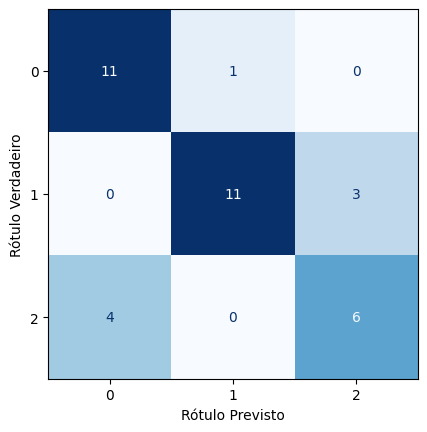

In [9]:
# Mostrar a matriz de confusão.
# A matriz de confusão é um dispositivo para avaliar quais os erros que o modelo cometeu.
# A diagonal principal mostra o número de acertos por classe. Todos os elementos fora da diagonal principal representam erros.
ConfusionMatrixDisplay.from_predictions(y_teste, pred, colorbar=False, cmap="Blues")
plt.xlabel("Rótulo Previsto")
plt.ylabel("Rótulo Verdadeiro")
plt.show()

In [10]:
# Mostrar os erros cometidos pelo classificador. 
# Na prática imprime a interpretação da matriz de confusão acima.
print(explicar_mconf(y_teste, pred))

1 exemplo  da classe 0 foi   classificado  como classe 1
3 exemplos da classe 1 foram classificados como classe 2
4 exemplos da classe 2 foram classificados como classe 0
28/36 exemplos foram classificados corretamente (acurácia: 77.78%)

